# 와이오엘오 크로켓 구글 플레이 스토어 리뷰 분석

> 2-8까지 와이오엘오 크로켓 서비스 구글 플레이스토어 리뷰 크롤링
>> Tony Park의 크롤러 코드 사용 

> 9번부터 크로켓 리뷰데이터 감성 분석
 >> 도서 파이썬 머신러닝 완벽가이드 & hyemin-kim 깃허브 참고

- References
    - Tistory Blog | https://heytech.tistory.com/
    - Github | https://github.com/park-gb ,https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/

# 구글 플레이스토어 리뷰 웹 크롤러 초기 설정

## 크롬 드라이버 세팅

In [7]:
# chrome_driver = '../chromedriver.exe' # 파일 확장자 이름 표기
chrome_driver = 'chromedriver' # 파일 확장자 이름 미표기

## 수집 앱 URL

In [8]:
URL = 'https://play.google.com/store/apps/details?id=com.yolo.yeogoo'

# 패키지 import

In [3]:
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
from time import sleep
import random
#from tqdm.auto import tqdm, trange
import pandas as pd

# 무한 스크롤 함수

In [9]:
def scroll(modal):
    try:        
        # 스크롤 높이 받아오기
        last_height = driver.execute_script("return arguments[0].scrollHeight", modal)
        while True:
            pause_time = random.uniform(0.2, 30)
            # 최하단까지 스크롤
            driver.execute_script("arguments[0].scrollTo(0, arguments[0].scrollHeight);", modal)
            # 페이지 로딩 대기
            time.sleep(pause_time)
            # 무한 스크롤 동작을 위해 살짝 위로 스크롤
            driver.execute_script("arguments[0].scrollTo(0, arguments[0].scrollHeight-50);", modal)
            time.sleep(pause_time)
            # 스크롤 높이 새롭게 받아오기
            new_height = driver.execute_script("return arguments[0].scrollHeight", modal)
            try:
                # '더보기' 버튼 있을 경우 클릭
                all_review_button = driver.find_element_by_xpath('/html/body/div[1]/div[4]/c-wiz/div/div[2]/div/div/main/div/div[1]/div[2]/div[2]/div/span/span').click()
            except:
                # 스크롤 완료 경우
                if new_height == last_height:
                    print("스크롤 완료")
                    break
                last_height = new_height
                
    except Exception as e:
        print("에러 발생: ", e)

# 데이터 크롤링

In [5]:
from selenium import webdriver

In [10]:
# 크롬 드라이버 세팅
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--disable-blink-features=AutomationControlled')
driver = webdriver.Chrome(chrome_driver, options = chrome_options)

In [11]:
# 페이지 열기
driver.get(URL)
# 페이지 로딩 대기
wait = WebDriverWait(driver, 30)

# '리뷰 모두 보기' 버튼 렌더링 확인(path 수정 @2022-06-22)
all_review_button_xpath = '/html/body/c-wiz[2]/div/div/div[1]/div[2]/div/div[1]/c-wiz[4]/section/div/div/div[5]/div/div/button/span'
button_loading_wait = wait.until(EC.element_to_be_clickable((By.XPATH, all_review_button_xpath)))
# '리뷰 모두 보기' 버튼 클릭
driver.find_element_by_xpath(all_review_button_xpath).click()

# '리뷰 모두 보기' 페이지 렌더링 대기
all_review_page_xpath = '/html/body/div[4]/div[2]/div/div/div/div/div[2]'
page_loading_wait = wait.until(EC.element_to_be_clickable((By.XPATH, all_review_page_xpath)))

# 페이지 무한 스크롤 다운
modal = WebDriverWait(driver, 30).until(EC.element_to_be_clickable((By.XPATH, "//div[@class='fysCi']")))
scroll(modal)

스크롤 완료


In [12]:
driver.get_cookies()

[{'domain': 'play.google.com',
  'expiry': 1661836258,
  'httpOnly': False,
  'name': 'OTZ',
  'path': '/',
  'secure': True,
  'value': '6615671_20_20__20_'},
 {'domain': '.play.google.com',
  'expiry': 1722316256,
  'httpOnly': False,
  'name': '_ga',
  'path': '/',
  'secure': False,
  'value': 'GA1.3.1523532692.1659244257'},
 {'domain': '.play.google.com',
  'expiry': 1659330656,
  'httpOnly': False,
  'name': '_gid',
  'path': '/',
  'secure': False,
  'value': 'GA1.3.190946209.1659244257'},
 {'domain': '.google.com',
  'expiry': 1675055453,
  'httpOnly': True,
  'name': 'NID',
  'path': '/',
  'sameSite': 'None',
  'secure': True,
  'value': '511=kSh0qTNKKi8fGONOtMeiupfXvucLmExPJzBXgTsd8n7TD-4xeuaK55SXo_TEn2FavdSgoMUDlRZ3c1dD0GHDhYH4XAqRKwnNlK7ce4GlqBMrZkk24FM4lG8pR4QWLnaucL4bZdJJIYFSl7Naoq-K4s9_xI7Ohl6x5trCNvObmQM'}]

In [13]:
session = requests.Session()

# HTML Parsing

In [14]:
# html parsing하기
html_source = driver.page_source
soup_source = BeautifulSoup(html_source, 'html.parser')

# HTML 데이터 저장

In [15]:
# html 데이터 저장
with open("data_html.html", "w", encoding = 'utf-8') as file:
    file.write(str(soup_source))

## 데이터프레임 변환

In [16]:
from tqdm import tqdm

In [17]:
# 리뷰 데이터 클래스 접근
review_source = soup_source.find_all(class_ = 'RHo1pe')
# 리뷰 데이터 저장용 배열
dataset = []
# 데이터 넘버링을 위한 변수
review_num = 0 
# 리뷰 1개씩 접근해 정보 추출
for review in tqdm(review_source):
    review_num+=1
    # 리뷰 등록일 데이터 추출
    date_full = review.find_all(class_ = 'bp9Aid')[0].text
    date_year = date_full[0:4] # 연도 데이터 추출
    # 해당 단어가 등장한 인덱스 추출
    year_index = date_full.find('년')
    month_index = date_full.find('월')
    day_index = date_full.find('일')
    
    date_month = str(int(date_full[year_index+1:month_index])) # 월(Month) 데이터 추출
    # 월 정보가 1자리의 경우 앞에 0 붙이기(e.g., 1월 -> 01월)
    if len(date_month) == 1:
        date_month = '0' + date_month
    
    date_day = str(int(date_full[month_index+1:day_index])) # 일(Day) 데이터 추출 
    # 일 정보가 1자리의 경우 앞에 0 붙여줌(e.g., 7일 -> 07일)
    if len(date_day) == 1:
        date_day = '0' + date_day
    
    # 리뷰 등록일 full version은 최종적으로 yyyymmdd 형태로 저장
    date_full = date_year + date_month + date_day
    user_name = review.find_all(class_ = 'X5PpBb')[0].text # 닉네임 데이터 추출
    rating = review.find_all(class_ = "iXRFPc")[0]['aria-label'][10] # 평점 데이터 추출
    content = review.find_all(class_ = 'h3YV2d')[0].text # 리뷰 데이터 추출

    data = {
        "id": review_num, 
        "date": date_full,
        "dateYear": date_year,
        "dateMonth": date_month,
        "dateDay": date_day,
        "rating": rating,
        "userName": user_name,
        "content": content
    }
    dataset.append(data)

100%|███████████████████████████████████████████████████████████████████████████████| 611/611 [00:03<00:00, 160.48it/s]


## 데이터프레임 저장

In [18]:
df = pd.DataFrame(dataset)
df.to_csv('review_dataset.csv', encoding = 'utf-8-sig') # csv 파일로 저장

# 리뷰 데이터 불러오기

In [4]:
# 저장한 리뷰 정보 불러오기
df = pd.read_csv('review_dataset.csv', encoding = 'utf-8-sig')
# df = df.drop(['Unnamed: 0'], axis = 1) # 불필요한 칼럼 삭제
df

,Unnamed: 0,id,date,dateYear,dateMonth,dateDay,rating,userName,content
0,0,1,20220715,2022,7,15,3,22 33,정품이지만 상태 안좋은거 파는 판매자도 있네요. 해외구매대행이라 시간도 오래걸리고 ...
1,1,2,20220729,2022,7,29,4,노정미,일단 해외상품을 쉽게 구매 할 수 있습니다. 그리고 사기방지가 잘되있는 것도 장점이...
2,2,3,20190601,2019,6,1,3,Google 사용자,개선점 1. 마켓에서 위로가기 버튼 만드는게 시급합니다. 2. 이용가이드를 어플설치...
3,3,4,20220316,2022,3,16,4,용미용,해외 직구를 잘 안 하는 사람들도 편하게 할 수 있다는 장점이 있구요. 명품 같은 ...
4,4,5,20211122,2021,11,22,5,Lee hyunjin,여러 웹사이트에서 해외직구 해봤지만 크로켓이 UI가 깔끔하고 접근하기 편해서 여기로...
...,...,...,...,...,...,...,...,...,...
606,606,607,20170613,2017,6,13,5,Google 사용자,편리해요
607,607,608,20200911,2020,9,11,5,jy 9,좋습니다
608,608,609,20200924,2020,9,24,3,emily cho,좋아요
609,609,610,20170615,2017,6,15,5,Google 사용자,좋아요


# 리뷰데이터 살펴보기 

 - 리뷰 3.78천개 중 611개 수집됨
 - 전체 리뷰중 16%의 표본으로 분석한 한계  

In [5]:
print(df.shape)
df.head()

(611, 9)


,Unnamed: 0,id,date,dateYear,dateMonth,dateDay,rating,userName,content
0,0,1,20220715,2022,7,15,3,22 33,정품이지만 상태 안좋은거 파는 판매자도 있네요. 해외구매대행이라 시간도 오래걸리고 ...
1,1,2,20220729,2022,7,29,4,노정미,일단 해외상품을 쉽게 구매 할 수 있습니다. 그리고 사기방지가 잘되있는 것도 장점이...
2,2,3,20190601,2019,6,1,3,Google 사용자,개선점 1. 마켓에서 위로가기 버튼 만드는게 시급합니다. 2. 이용가이드를 어플설치...
3,3,4,20220316,2022,3,16,4,용미용,해외 직구를 잘 안 하는 사람들도 편하게 할 수 있다는 장점이 있구요. 명품 같은 ...
4,4,5,20211122,2021,11,22,5,Lee hyunjin,여러 웹사이트에서 해외직구 해봤지만 크로켓이 UI가 깔끔하고 접근하기 편해서 여기로...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  611 non-null    int64 
 1   id          611 non-null    int64 
 2   date        611 non-null    int64 
 3   dateYear    611 non-null    int64 
 4   dateMonth   611 non-null    int64 
 5   dateDay     611 non-null    int64 
 6   rating      611 non-null    int64 
 7   userName    611 non-null    object
 8   content     611 non-null    object
dtypes: int64(7), object(2)
memory usage: 43.1+ KB


In [9]:
# 수집된 리뷰의 작성기간 분포
df['date'].min(), df['date'].max()

(20170613, 20220729)

In [30]:
# 별점 분포
df['rating'].value_counts()

5    433
1     90
4     44
3     32
2     12
Name: rating, dtype: int64

In [32]:
import seaborn as sns

<AxesSubplot:xlabel='rating', ylabel='Count'>

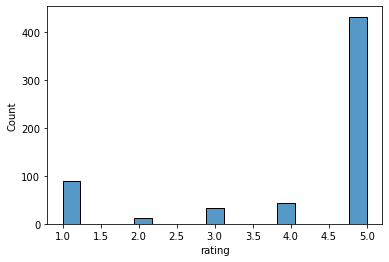

In [31]:
# 별점 분포 그래프 
sns.histplot(data=df, x='rating')

In [20]:
# 별점 평균
df['rating'].mean()

4.175122749590835

In [21]:
# 별점 1~3점은 부정 / 4~5점은 긍정 리뷰로 분리

In [101]:
high = df.loc[(df['rating']==5) | (df['rating']==4) ,['rating','content']]
high

,rating,content
1,4,일단 해외상품을 쉽게 구매 할 수 있습니다. 그리고 사기방지가 잘되있는 것도 장점이...
3,4,해외 직구를 잘 안 하는 사람들도 편하게 할 수 있다는 장점이 있구요. 명품 같은 ...
4,5,여러 웹사이트에서 해외직구 해봤지만 크로켓이 UI가 깔끔하고 접근하기 편해서 여기로...
5,5,"이전에 어플이름이 변경되기 전부터 사용을 했는데, 업데이트가 되며 어플 내 구매과정..."
6,5,직구 제품을 쉽게 구매할 수 있어서 좋고 또 믿음직스러운 것 같아요! 벌써 3번째 ...
...,...,...
605,5,여행의직구를 항상 응원합니다^^
606,5,편리해요
607,5,좋습니다
609,5,좋아요


In [112]:
high.to_csv('high_content.csv', encoding = 'utf-8')

In [104]:
low = df.loc[(df['rating']!=5) & (df['rating']!=4), ['rating','content']]
low

,rating,content
0,3,정품이지만 상태 안좋은거 파는 판매자도 있네요. 해외구매대행이라 시간도 오래걸리고 ...
2,3,개선점 1. 마켓에서 위로가기 버튼 만드는게 시급합니다. 2. 이용가이드를 어플설치...
8,2,물건 수령하는데 두달은 잡고 주문하세요. 기념일 1달전부터 물건 주문하고 환불받고 ...
11,2,"1월27일자 버전(6.1.3) 사용중, 리퀘스트 필터-대륙(혹은 나라) 선택시 아시..."
22,3,제품을 처음 받아봤는데ㅜㅜ 실망입니다; 제품에 뒤쪽 지퍼부분 박음질이 미완성 되어 ...
...,...,...
574,3,이거 스토어등록하기 하는데서버와의 연결이 원할하지 않는다고 하네요ㅠ
576,1,두바이여행 가는데 여행자등록엔 중동은 터키밖에 없네요 업뎃좀
589,1,이거 리스트 작성할때 사진 올리기가 안되요.
593,1,신뢰도가 걱정이에요


In [113]:
low.to_csv('low_content.csv', encoding = 'utf-8')

In [18]:
from konlpy.tag import Okt
from collections import Counter

In [20]:
!pip install --upgrade pip

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\a\\AppData\\Local\\Temp\\pip-uninstall-3w4xim7k\\pip.exe'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [21]:
!pip install JPype1-1.2.0-cp38-cp38-win_amd64.whl

ERROR: JPype1-1.2.0-cp38-cp38-win_amd64.whl is not a supported wheel on this platform.


In [16]:
!pip install konlpy

You should consider upgrading via the 'C:\Users\a\anaconda3\python.exe -m pip install --upgrade pip' command.


  Using cached beautifulsoup4-4.6.0-py3-none-any.whl (86 kB)
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0


In [196]:
# 평점 4 이상인 리뷰 중 사용빈도수 top 10
filename = "high_content.csv"
f = open(filename,'r',encoding='utf-8')
news = f.read()

okt = Okt()
noun = okt.nouns(news)
count = Counter(noun)

# for v in noun_list:
#     if len(v) > 1 :
# 한글자이상 단어만 보이지 않는 이유 무엇? 
#         print(v)


available_count = Counter({n: count[n] for n in count if len(n) > 1})      
available_count.most_common(20)



[('직구', 135),
 ('구매', 134),
 ('해외', 93),
 ('상품', 77),
 ('제품', 75),
 ('가격', 67),
 ('크로켓', 67),
 ('이용', 50),
 ('사용', 44),
 ('어플', 42),
 ('배송', 41),
 ('판매', 33),
 ('물건', 33),
 ('자주', 30),
 ('정말', 27),
 ('정품', 26),
 ('사이트', 25),
 ('비교', 21),
 ('국내', 21),
 ('다른', 20)]

In [197]:
# 평점 4 미만인 리뷰 중 사용빈도수 top 10
low_filename = "low_content.csv"
f = open(low_filename,'r',encoding='utf-8')
low_news = f.read()

okt = Okt()
noun = okt.nouns(low_news)
count = Counter(noun)

available_count = Counter({n: count[n] for n in count if len(n) > 1})      
available_count.most_common(20)


[('판매', 25),
 ('구매', 25),
 ('환불', 25),
 ('어플', 20),
 ('물건', 19),
 ('가격', 16),
 ('가입', 16),
 ('직구', 14),
 ('제품', 14),
 ('다시', 14),
 ('계속', 14),
 ('업데이트', 12),
 ('삭제', 12),
 ('해외', 11),
 ('사용', 11),
 ('사이트', 11),
 ('그냥', 11),
 ('주문', 10),
 ('셀러', 10),
 ('번호', 10)]

# 불용어 사전 가져오기

In [110]:
stopwords = pd.read_csv('korean_stopwords.txt').values.tolist()
stopwords[:5]

[['휴'], ['아이구'], ['아이쿠'], ['아이고'], ['어']]

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

In [123]:
content = df[['rating','content']]
content.head()

,rating,content
0,3,정품이지만 상태 안좋은거 파는 판매자도 있네요. 해외구매대행이라 시간도 오래걸리고 ...
1,4,일단 해외상품을 쉽게 구매 할 수 있습니다. 그리고 사기방지가 잘되있는 것도 장점이...
2,3,개선점 1. 마켓에서 위로가기 버튼 만드는게 시급합니다. 2. 이용가이드를 어플설치...
3,4,해외 직구를 잘 안 하는 사람들도 편하게 할 수 있다는 장점이 있구요. 명품 같은 ...
4,5,여러 웹사이트에서 해외직구 해봤지만 크로켓이 UI가 깔끔하고 접근하기 편해서 여기로...


In [124]:
content.to_csv('content.csv', encoding = 'utf-8')

# BoW 백터 생성


- Bag of Words 
- 문장의 문맥이나 순서를 무시하고 단어에 빈도값을 부여해 피쳐값을 추출하는 모델
- 모든 단어를 가방에 넣고 흔들어 섞는다는 의미
- 쉽게 텍스트의 특징을 나타낼 수 있지만 문맥 의미 반영 안됨

In [127]:
# BoW 백터 생성

# 단어 추출
content_filename = "content.csv"
f = open(low_filename,'r',encoding='utf-8')
content = f.read()


def content_cleaning(content):
    okt = Okt()
    noun = okt.nouns(content)
    noun = [n for n in noun if len(n) > 1] # 한글자 키워드 제거
    noun = [n for n in noun if n not in stopwords] # 불용어 제거
    return noun

# 피쳐 백터화 
vect = CountVectorizer(tokenizer = lambda n : content_cleaning(n))
bow_vect = vect.fit_transform(df['content'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

C:\Users\a\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [129]:
# 각 단어가 전체 리뷰증에 등장한 총 횟수
count_list

array([83,  5,  2, ...,  2,  1,  1], dtype=int64)

In [130]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [131]:
bow_vect.shape

(611, 1041)

In [132]:
# 단어와 총 등장횟수 매치
word_count_dict = dict(zip(word_list,count_list))
word_count_dict

{'가격': 83,
 '가기': 5,
 '가까이': 2,
 '가끔': 1,
 '가능': 3,
 '가령': 1,
 '가면': 2,
 '가방': 8,
 '가성': 3,
 '가요': 2,
 '가운데': 1,
 '가원': 2,
 '가이드': 1,
 '가입': 24,
 '가입자': 1,
 '가장': 7,
 '가지': 2,
 '가짜': 4,
 '가치': 1,
 '가품': 12,
 '가형': 1,
 '간다': 1,
 '간단': 1,
 '간식': 1,
 '간편': 1,
 '갑자기': 5,
 '강제': 1,
 '강추': 3,
 '개개인': 1,
 '개꿀띠': 1,
 '개꿀잼': 1,
 '개발자': 1,
 '개선': 5,
 '개월': 2,
 '개이득': 2,
 '개인': 8,
 '개인정보': 1,
 '개좋은듸': 1,
 '개편': 1,
 '갠찮': 1,
 '갤럭시': 1,
 '거기': 2,
 '거나': 3,
 '거도': 1,
 '거래': 8,
 '거르': 1,
 '거르시길': 1,
 '거리': 1,
 '거만': 1,
 '거부': 1,
 '거의': 4,
 '거임': 1,
 '거주': 2,
 '거지': 1,
 '거품': 5,
 '걱정': 8,
 '건가': 1,
 '검사': 1,
 '검색': 13,
 '검수': 1,
 '검품': 1,
 '것보': 1,
 '게다가': 2,
 '게시': 2,
 '겟할': 1,
 '결과': 2,
 '결재': 3,
 '결정': 1,
 '결제': 16,
 '경우': 8,
 '경쟁력': 2,
 '경험': 1,
 '계속': 20,
 '계절': 1,
 '계정': 1,
 '계좌': 3,
 '고객': 6,
 '고구': 1,
 '고급러워': 1,
 '고유': 1,
 '고정': 2,
 '고해': 3,
 '골뱅이': 1,
 '공용': 1,
 '과자': 2,
 '과정': 2,
 '관련': 4,
 '관리': 1,
 '관리자': 1,
 '관세': 3,
 '관심': 4,
 '광고': 13,
 '광택': 1,
 '괜쭌': 1,
 '구경': 16,
 '구경만': 1,
 '구경만해':

In [133]:
# bow 벡터에 대해 TF-IDF 변환
# 개별 문서에서 자주 나타나는 단어에 가중치를 두되, 모든문서에서 전반적으로 자주 나타나는 단어에는 패널티를 주는 방식으로 값을 부여
# 실질적으로 중요한 단어를 알 수 있는 방식
# 텍스트 길이가 긴 경우 더 좋은 예측성능 기대

from sklearn.feature_extraction.text import TfidfTransformer

In [134]:
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [135]:
print(tf_idf_vect.shape)

(611, 1041)


In [138]:
# 첫번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌것만출력
print(tf_idf_vect[0])

  (0, 1037)	0.1417598129788096
  (0, 996)	0.059704821595255184
  (0, 972)	0.1417598129788096
  (0, 966)	0.2200958045172553
  (0, 951)	0.10398242436703695
  (0, 944)	0.11534660612148684
  (0, 930)	0.07807728937216489
  (0, 894)	0.1417598129788096
  (0, 865)	0.12714552414435515
  (0, 839)	0.1417598129788096
  (0, 834)	0.13321100203594585
  (0, 823)	0.05326616649219637
  (0, 802)	0.13321100203594585
  (0, 787)	0.11253123530990068
  (0, 766)	0.17873627106516496
  (0, 716)	0.1417598129788096
  (0, 701)	0.1417598129788096
  (0, 680)	0.1417598129788096
  (0, 676)	0.07306622928895398
  (0, 648)	0.12714552414435515
  (0, 610)	0.2835196259576192
  (0, 546)	0.1417598129788096
  (0, 542)	0.12714552414435515
  (0, 532)	0.2835196259576192
  (0, 492)	0.2200958045172553
  (0, 448)	0.12244077398174556
  (0, 436)	0.24488154796349113
  (0, 397)	0.23069321224297368
  (0, 354)	0.1417598129788096
  (0, 346)	0.2664220040718917
  (0, 336)	0.12714552414435515
  (0, 334)	0.11004790225862765
  (0, 224)	0.1417598

In [139]:
# 첫번째 리뷰에서 모든 단어의 중요도 -- 0인 것까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 1041)
[[0. 0. 0. ... 0. 0. 0.]]


In [140]:
# 벡터와 단어 매핑
vect.vocabulary_

{'정품': 766,
 '상태': 436,
 '판매': 930,
 '자도': 716,
 '해외': 996,
 '대행': 213,
 '시간': 492,
 '하자': 972,
 '반품': 354,
 '이용': 676,
 '느낌': 175,
 '검수': 59,
 '안해': 542,
 '폴로': 951,
 '후드': 1037,
 '집업': 839,
 '선물': 448,
 '알코': 546,
 '도저히': 224,
 '진품': 834,
 '기모': 140,
 '안감': 532,
 '박음질': 346,
 '옷감': 610,
 '이음': 680,
 '부분': 397,
 '하나': 966,
 '컷팅': 894,
 '기분': 142,
 '평소': 944,
 '중국': 802,
 '직구': 823,
 '일본': 701,
 '유럽': 648,
 '미국': 336,
 '최악': 865,
 '종류': 787,
 '나라': 155,
 '물품': 334,
 '구매': 103,
 '다음': 186,
 '일단': 697,
 '상품': 437,
 '방지': 364,
 '장점': 735,
 '이구': 663,
 '검색': 58,
 '기능': 137,
 '인터페이스': 695,
 '개선': 32,
 '여지': 586,
 '마켓': 276,
 '위로': 643,
 '가기': 1,
 '버튼': 370,
 '가이드': 12,
 '어플': 566,
 '설치': 452,
 '직후': 829,
 '화면': 1020,
 '요청': 622,
 '여행자': 590,
 '국가': 115,
 '하든': 969,
 '등록': 243,
 '아랫쪽': 515,
 '가운데': 10,
 '페이지': 936,
 '우상': 628,
 '고정': 80,
 '사람': 417,
 '명품': 304,
 '겟할': 64,
 '인기': 689,
 '이나': 664,
 '최신': 864,
 '가격': 0,
 '순서대로': 485,
 '정렬': 759,
 '다른': 181,
 '가능': 4,
 '목걸이': 309,
 '반지': 353,
 '

In [142]:
invert_index_vectorizer = {v : k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{766: '정품', 436: '상태', 930: '판매', 716: '자도', 996: '해외', 213: '대행', 492: '시간', 972: '하자', 354: '반품', ...


In [150]:
content = pd.read_csv('content.csv')
# content = content.drop(['Unnamed: 0'], axis = 1) # 불필요한 칼럼 삭제
content.head()

,Unnamed: 0,rating,content
0,0,3,정품이지만 상태 안좋은거 파는 판매자도 있네요. 해외구매대행이라 시간도 오래걸리고 ...
1,1,4,일단 해외상품을 쉽게 구매 할 수 있습니다. 그리고 사기방지가 잘되있는 것도 장점이...
2,2,3,개선점 1. 마켓에서 위로가기 버튼 만드는게 시급합니다. 2. 이용가이드를 어플설치...
3,3,4,해외 직구를 잘 안 하는 사람들도 편하게 할 수 있다는 장점이 있구요. 명품 같은 ...
4,4,5,여러 웹사이트에서 해외직구 해봤지만 크로켓이 UI가 깔끔하고 접근하기 편해서 여기로...


# 감성분류 예측모델 만들기

In [151]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0

content['y'] = content['rating'].apply(lambda x : rating_to_label(x))

In [153]:
content = content.drop(['Unnamed: 0'], axis = 1)
content.head()

,rating,content,y
0,3,정품이지만 상태 안좋은거 파는 판매자도 있네요. 해외구매대행이라 시간도 오래걸리고 ...,0
1,4,일단 해외상품을 쉽게 구매 할 수 있습니다. 그리고 사기방지가 잘되있는 것도 장점이...,1
2,3,개선점 1. 마켓에서 위로가기 버튼 만드는게 시급합니다. 2. 이용가이드를 어플설치...,0
3,4,해외 직구를 잘 안 하는 사람들도 편하게 할 수 있다는 장점이 있구요. 명품 같은 ...,1
4,5,여러 웹사이트에서 해외직구 해봤지만 크로켓이 UI가 깔끔하고 접근하기 편해서 여기로...,1


In [154]:
# 트레이닝셋과 테스트셋 나누기

from sklearn.model_selection import train_test_split

In [155]:
x = tf_idf_vect
y = content['y']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=1)

In [156]:
x_train.shape, y_train.shape

((427, 1041), (427,))

In [ ]:
# 모델학습

In [ ]:
logistic Regression 모델학습

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [161]:
# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [ ]:
# 분류 결과 평가

In [163]:
# classification result for test set

print('accuracy : %.2f' % accuracy_score(y_test, y_pred))
print('precision : %.2f' % precision_score(y_test, y_pred))
print('recall : %.2f' % recall_score(y_test, y_pred))
print('F1 : %.2f' % f1_score(y_test, y_pred))

accuracy : 0.82
precision : 0.81
recall : 1.00
F1 : 0.90


# 긍정/부정 키워드 분석

In [165]:
lr.coef_

array([[-0.1388955 ,  0.02574327,  0.        , ...,  0.09233235,
        -0.17786611, -0.58427683]])

In [167]:
import matplotlib.pyplot as plt

<BarContainer object of 1041 artists>

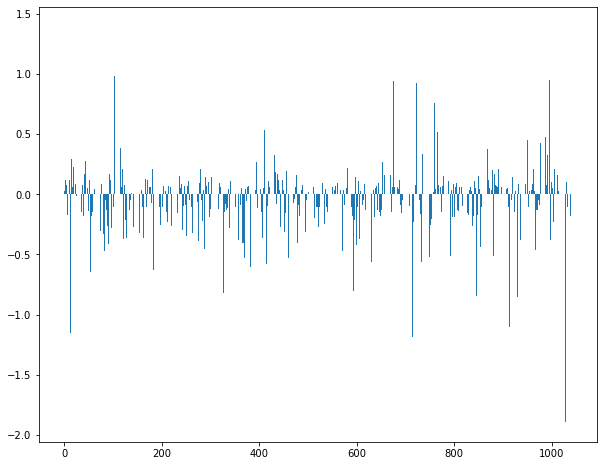

In [171]:
# print logistic regression's coef

plt.figure(figsize=(10,8))
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])

In [ ]:
# 긍정/부정 키워드 리스트 정의하기

In [172]:
coef_pos_index = sorted(((value,index)for index, value in enumerate(lr.coef_[0])),reverse=True)
coef_neg_index = sorted(((value,index)for index, value in enumerate(lr.coef_[0])),reverse=False)

In [ ]:
# 인덱스를 단어로 변환해서 키워드 리스트 top 20단어 출력하기

In [174]:
invert_index_vectorizer = {v : k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{766: '정품',
 436: '상태',
 930: '판매',
 716: '자도',
 996: '해외',
 213: '대행',
 492: '시간',
 972: '하자',
 354: '반품',
 676: '이용',
 175: '느낌',
 59: '검수',
 542: '안해',
 951: '폴로',
 1037: '후드',
 839: '집업',
 448: '선물',
 546: '알코',
 224: '도저히',
 834: '진품',
 140: '기모',
 532: '안감',
 346: '박음질',
 610: '옷감',
 680: '이음',
 397: '부분',
 966: '하나',
 894: '컷팅',
 142: '기분',
 944: '평소',
 802: '중국',
 823: '직구',
 701: '일본',
 648: '유럽',
 336: '미국',
 865: '최악',
 787: '종류',
 155: '나라',
 334: '물품',
 103: '구매',
 186: '다음',
 697: '일단',
 437: '상품',
 364: '방지',
 735: '장점',
 663: '이구',
 58: '검색',
 137: '기능',
 695: '인터페이스',
 32: '개선',
 586: '여지',
 276: '마켓',
 643: '위로',
 1: '가기',
 370: '버튼',
 12: '가이드',
 566: '어플',
 452: '설치',
 829: '직후',
 1020: '화면',
 622: '요청',
 590: '여행자',
 115: '국가',
 969: '하든',
 243: '등록',
 515: '아랫쪽',
 10: '가운데',
 936: '페이지',
 628: '우상',
 80: '고정',
 417: '사람',
 304: '명품',
 64: '겟할',
 689: '인기',
 664: '이나',
 864: '최신',
 0: '가격',
 485: '순서대로',
 759: '정렬',
 181: '다른',
 4: '가능',
 309: '목걸이',
 353: '반지',
 7

## 크로켓 앱 리뷰 긍정단어 20

- 해외 상품을 직구할 수 있다는 점과 배송, 정품여부에 긍정적인 평가, 
- 브랜드 중 폴로에 만족함
- 이용을 자주 한다거나 한눈에 사용하기 편하다는 점이 긍정적인 평가로 나타나는것으로 보아 인터페이스 만족도 좋음

In [177]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]],coef[0])

직구 1.392148411751795
구매 0.9847084725637473
크로켓 0.9519432920251558
해외 0.9489377637230364
이용 0.9422197724689246
자주 0.9248226975451953
배송 0.8208017574385669
정말 0.7609620949172397
최고 0.6822524964087749
상품 0.6763899524325051
비교 0.5325054856441076
정품 0.5155324018812312
구입 0.4995401879735979
여행 0.4859289933107325
합리 0.47709678292598634
폴로 0.44773083424384874
여기 0.43738181229654943
한눈 0.42894635968643074
사용 0.426599118940966
덕분 0.4246355917896907


## 부정단어 20 

- 환불, 입금 등 거래 단계에서의 부정적 의견
- 네이버 관련 이슈 있음
- 가입과 인증 등 사용 초기 단계에 불만족과 개선 필요? 

In [178]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]],coef[0])

환불 -1.8921104686670156
네이버 -1.365645383781388
자꾸 -1.1866792624307687
인증 -1.1684900316769982
가입 -1.1539290453623299
그냥 -1.111947423732774
탈퇴 -1.0987685710678485
회원 -1.0373660159386053
삭제 -1.003350087095811
쿠폰 -0.9112786662114422
판매 -0.8518394536002117
차이 -0.8457863206879886
선택 -0.8455902145089212
문자 -0.8243310801468431
연락 -0.8033413133594709
다운 -0.7678644535393513
입금 -0.7646922235908529
거품 -0.6491210706875024
다시 -0.6273357083200476
쓰기 -0.6242319601992646
